# Numerical calculation of energy release rate

Energy release rate by definition:

$$
G = -\frac{\partial \Pi}{\partial s},
$$

wherein elastodynamics,

$$
\Pi = \Psi_e + K - W_e
$$

We evaluate $G$ with

$$
G = -\frac{\partial \Pi}{\partial s},
$$

and

$$
G = \frac{\partial \Psi_f}{\partial s},
$$

where the energies are computed with area (volume) integration directly from RACCOON,
the crack lengths are computed using [crack tip analysis](https://github.com/lyyc199586/cm-vis/blob/main/examples/crack_tip_analysis.ipynb) from raw crack tip trajectory from ParaView, see [PDcracktip](https://github.com/lyyc199586/pvfilters)

C:\Users\liuya\AppData\Local\Temp\ipykernel_10132\3952170403.py:19: RuntimeWarning: divide by zero encountered in divide
  G1 = -Total.diff().values / crack_length.diff().values
C:\Users\liuya\AppData\Local\Temp\ipykernel_10132\3952170403.py:20: RuntimeWarning: divide by zero encountered in divide
  G2 = FE.diff().values / crack_length.diff().values
C:\Users\liuya\AppData\Local\Temp\ipykernel_10132\3952170403.py:20: RuntimeWarning: invalid value encountered in divide
  G2 = FE.diff().values / crack_length.diff().values


[(0.0, 4.0), Text(0.5, 1.0, 'Energy release rate'), Text(0, 0.5, '$G/G_c$')]

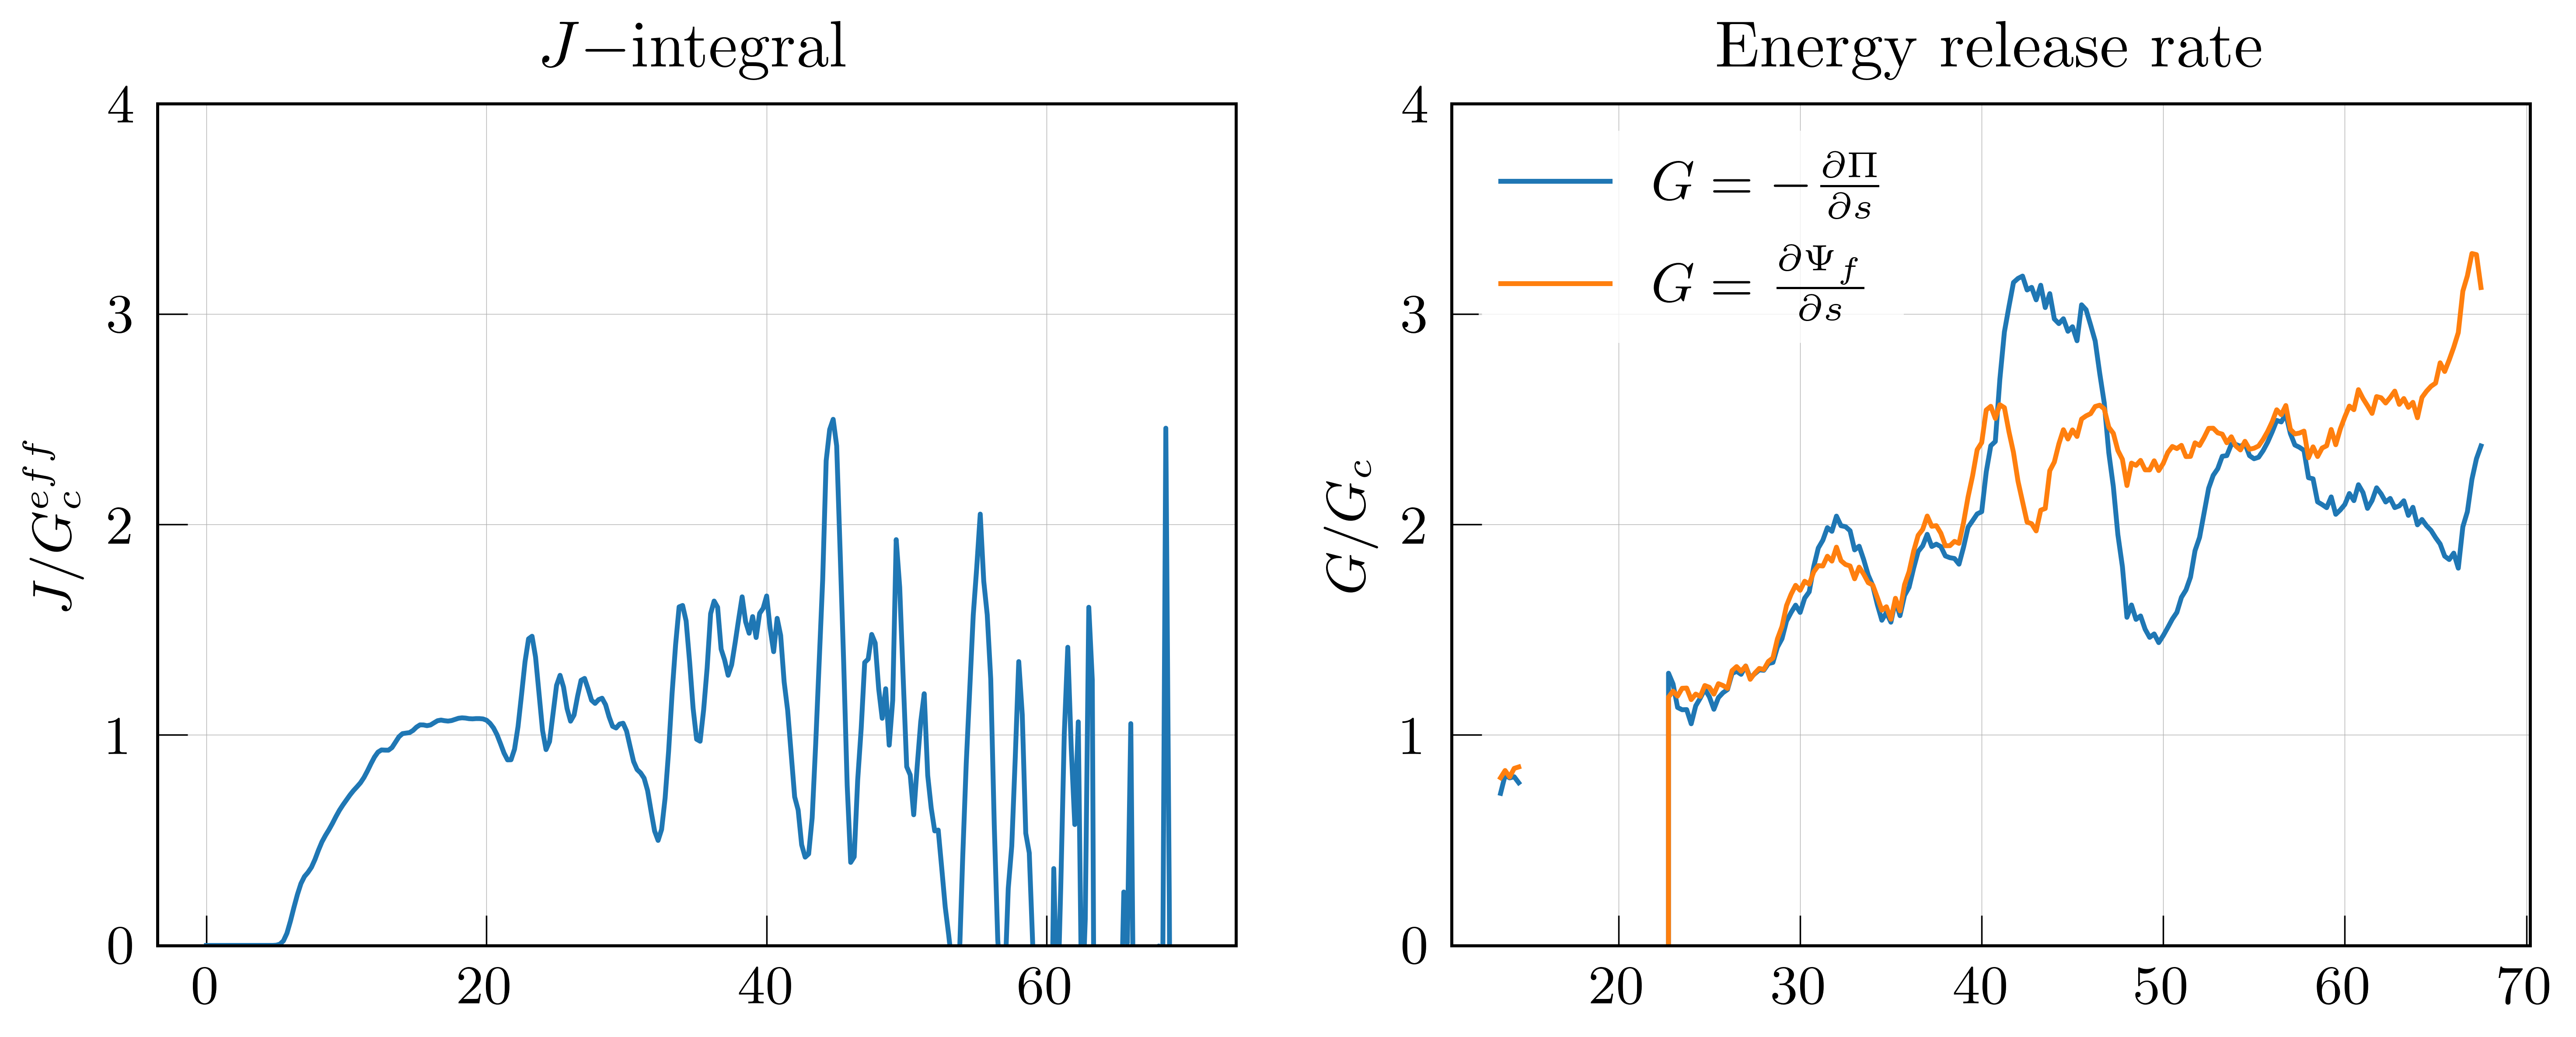

In [8]:
# load energies and crack tip info
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import cm_vis

energy = pd.read_csv("../data/tip/coh_p1_l0.625_h1_rf3_tb0_tf70.csv")
tip = pd.read_csv("../data/tip/coh_p1_l0.625_tip_d0.5_wl11_po5.csv")
# energy = pd.read_csv("../data/tip/nuc24_p1_l0.625_h1_rf3_tb0_tf70.csv")
# tip = pd.read_csv("../data/tip/nuc24_p1_l0.625_tip_d0.5_wl11_po5.csv")

# calculate G
en = energy.copy()
Total = en["SE"] + en["KE"] - en["PEW"]
FE = en["FE"]
crack_length = tip["Raw Length"].copy()

G1 = -Total.diff().values / crack_length.diff().values
G2 = FE.diff().values / crack_length.diff().values

# smooth
G1_smooth = savgol_filter(G1, window_length=19, polyorder=2)
G2_smooth = savgol_filter(G2, window_length=19, polyorder=2)

# plot G compared to J int
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 2.5))
plt.style.use("elsevier")

Gc = 3e-3
ax1.plot(en["time"], en["DJ"] / Gc, label="DJ")
ax2.plot(en["time"], G1_smooth / Gc, label=r"$G = -\frac{\partial\Pi}{\partial s}$")
ax2.plot(en["time"], G2_smooth / Gc, label=r"$G = \frac{\partial\Psi_f}{\partial s}$")
ax2.legend()

ax1.set(ylim=[0, 4], title="$J-$integral", ylabel=r"$J/G_c^{eff}$")
ax2.set(ylim=[0, 4], title="Energy release rate", ylabel=r"$G/G_c$")